# **Deep Computer Vision Using Convolutional Neural Networks**

# Notes

* Vision tasks are easy for us and effortless
* The answer lies in the fact that perception largely takes place outside the realm of our
  * consciousness, within specialized visual, auditory, and other sensory modules in our brains. 
* Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex,
* CNNs have managed to achieve superhuman performance on some complex visual
  * tasks. They power image search services, self-driving cars, 
  * automatic video classification systems, and more.
* CNNs are not restricted to visual perception: but also, to voice recognition
  * and natural language processing
* we will discuss some of the best CNN architectures,
  *  as well as other visual tasks, including object detection
  *  (classifying multiple objects in an image and placing bounding boxes around them)
  *  and semantic segmentation (classifying each pixel according to the class of the object it belongs to).

# Architecture of the Visual cortex

* Many neurons in the visual cortex have a small local receptive field
  * meaning they react only to visual stimuli located in a limited region of the visual field
* 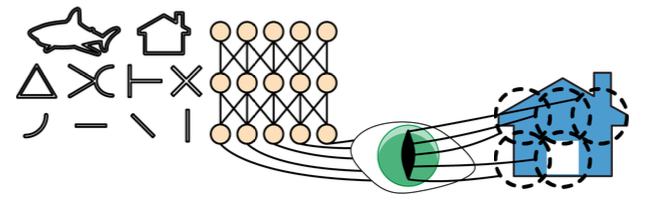
* Biological neurons in the visual cortex respond to specific patterns in small
  * regions of the visual field called receptive fields
  * as teh visual signal makes its way through consecutive brain modules, 
  * neurons respond to more complex patterns in larger receptive fields

# Convolutional